# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [64]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 5
page_size = 5

totalrev = pages*page_size
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 5 total reviews
Scraping page 2
   ---> 10 total reviews
Scraping page 3
   ---> 15 total reviews
Scraping page 4
   ---> 20 total reviews
Scraping page 5
   ---> 25 total reviews


In [65]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family flew from Washing...
1,✅ Trip Verified | Easy check in a T5. Galleri...
2,"Not Verified | Flight delayed by an hour, it ..."
3,Not Verified | The staff are very rude and not...
4,✅ Trip Verified | Good domestic flight operat...


In [66]:
data = df.to_csv("/Users/oluwadamilolapopoola/Documents/GitHub/BritishAirlineForage/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [67]:
import csv
arr = [] #Array to store all the reviews 

#Read the file from the directory and print 
with open('/Users/oluwadamilolapopoola/Documents/GitHub/BritishAirlineForage/BA_reviews.csv', 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        reviews = row[1]
        replace1 = reviews.replace('✅ Trip Verified |', "")
        replace2 = replace1.replace('Not Verified |', "")
        arr.append(replace2)
        
    #Prints and stores the reviews in an array and removes the String "Review" from index 0
    reviews_arr = arr.pop(0)
    print(arr)

['  My family flew from Washington to London on a British Airways A380, we were able to secure seats on the upper deck for a pretty hefty fee. Our flight was unfortunately delayed by 2 hrs from 2245 to 0120 causing us to miss a connection from Gatwick to Turin and making it so that no lounges were open by the time we got to the airport. Onboard I sat in a window seat which had a nice luggage bin which was very convenient for all my stuff. In flight entertainment system didn’t work very well, the touchscreen was disabled and the controller was quite glitchy and hard to use, it could use updating. The food for dinner was decent, they had pasta with tomato sauce which tasted good by airline standards. The seat was pretty comfortable, and the flight was smooth. After we missed our connection and we’re stuck behind security for 2 hrs waiting for escorts, they rebooked us on a flight from Heathrow to Milan the next day, gave us free bus tickets to Heathrow, gave us a free hotel room, and gav

Text:   My family flew from Washington to London on a British Airways A380, we were able to secure seats on the upper deck for a pretty hefty fee. Our flight was unfortunately delayed by 2 hrs from 2245 to 0120 causing us to miss a connection from Gatwick to Turin and making it so that no lounges were open by the time we got to the airport. Onboard I sat in a window seat which had a nice luggage bin which was very convenient for all my stuff. In flight entertainment system didn’t work very well, the touchscreen was disabled and the controller was quite glitchy and hard to use, it could use updating. The food for dinner was decent, they had pasta with tomato sauce which tasted good by airline standards. The seat was pretty comfortable, and the flight was smooth. After we missed our connection and we’re stuck behind security for 2 hrs waiting for escorts, they rebooked us on a flight from Heathrow to Milan the next day, gave us free bus tickets to Heathrow, gave us a free hotel room, and

Most Negative Words: []
Topics: [(0, '0.033*"ba" + 0.028*"flight" + 0.020*"inflight" + 0.020*"crew" + 0.019*"comfortable"'), (1, '0.026*"ba" + 0.021*"flight" + 0.016*"although" + 0.016*"best" + 0.015*"felt"'), (2, '0.038*"ba" + 0.031*"flight" + 0.020*"london" + 0.019*"although" + 0.019*"best"'), (3, '0.029*"ba" + 0.021*"flight" + 0.018*"crew" + 0.018*"inflight" + 0.017*"felt"'), (4, '0.052*"ba" + 0.047*"flight" + 0.021*"great" + 0.021*"could" + 0.020*"food"')]



Text:   Couldn’t book in online. Arrived at check in to find we had been bumped off due to overselling. No BA staff available. Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse. Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight. Airlines should be legally stopped from selling seats twice.
 
Sentiment Score: {'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'compound': 0.5709}
Sentiment: Positive
 
Most Negative Words: ['overselling', 'stopped']
Topics

Most Negative Words: ['disaster', 'problem', 'leave', 'cancelled', 'delayed', 'terrible']
Topics: [(0, '0.025*"hours" + 0.020*"us" + 0.019*"wait" + 0.019*"told" + 0.018*"plane"'), (1, '0.019*"told" + 0.018*"us" + 0.018*"hours" + 0.017*"wait" + 0.016*"first"'), (2, '0.029*"hours" + 0.026*"told" + 0.026*"us" + 0.025*"wait" + 0.024*"plane"'), (3, '0.030*"hours" + 0.021*"told" + 0.020*"plane" + 0.020*"us" + 0.020*"going"'), (4, '0.027*"hours" + 0.025*"plane" + 0.024*"wait" + 0.020*"us" + 0.019*"told"')]



Text:  I booked Premium Economy from INV to LAX (via LHR). They notified me of a cancelled flight on my return journey and rebooked me on a flight that my connecting flight arrived too late for! Then they cancelled a flight on my journey to LAX! They then cancelled the rebooked flight on the return journey and rebooking me back on the first flight that they had rebooked me on - the flight that I have no chance of making as my return flight arrives too late into LHR. They re-routed me fro

Most Negative Words: ['miserable', 'bored', 'avoided', 'uncomfortable', 'delay']
Topics: [(0, '0.019*"ba" + 0.018*"service" + 0.017*"gatwick" + 0.014*"long" + 0.014*"two"'), (1, '0.030*"ba" + 0.019*"two" + 0.015*"service" + 0.015*"gatwick" + 0.014*"miserable"'), (2, '0.022*"ba" + 0.019*"two" + 0.018*"gatwick" + 0.017*"service" + 0.014*"food"'), (3, '0.023*"ba" + 0.020*"gatwick" + 0.020*"service" + 0.018*"two" + 0.013*"class"'), (4, '0.020*"ba" + 0.017*"service" + 0.017*"gatwick" + 0.016*"two" + 0.014*"third"')]



Text:   Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highway saying situation - told not to worry, would note and flight rebooked if issue but go to airp

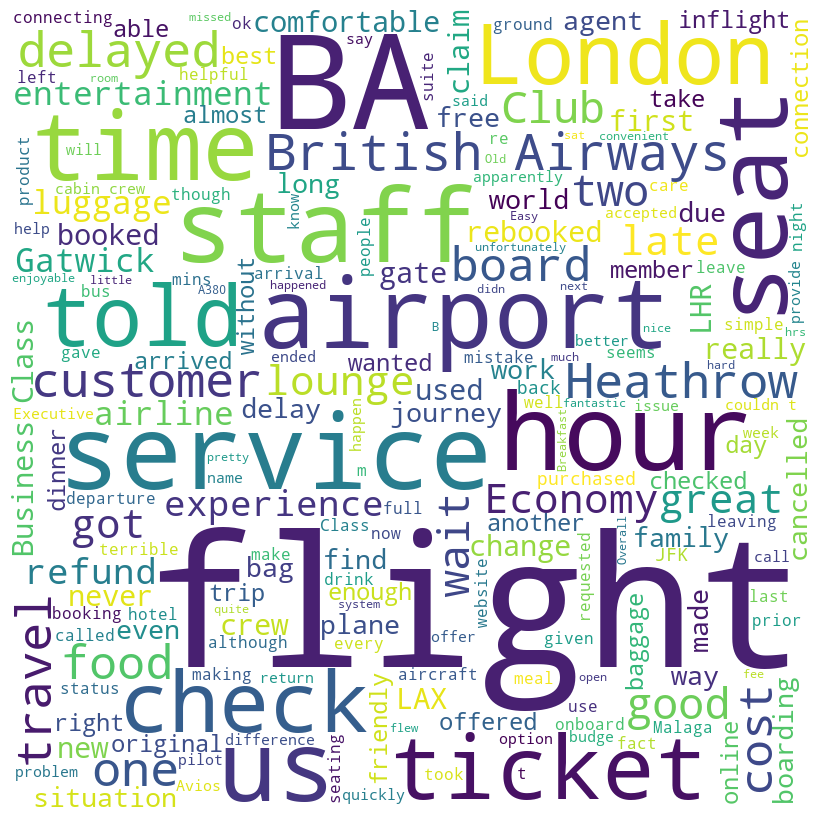

In [68]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
import networkx as nx


#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return words

#Function to perform sentiment analysis using vader algorithm
sia = SentimentIntensityAnalyzer()
def perform_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

def perform_topic_modeling(texts, num_topics=5):
    tokenized_texts = [preprocess_text(text) for text in texts]
    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    topics = lda_model.print_topics(num_words=5)
    return topics

def generate_word_cloud(texts):
    all_words = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=42).generate(all_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Perform sentiment analysis, topic modeling, and generate word cloud for each text
sent_arr = []
word_sentiments = {}
neg_arr = []
for text in arr:
    print("Text:", text)
    print(" ")
    
    sentiment_score = perform_sentiment_analysis(text)
    print("Sentiment Score:", sentiment_score)
    
    # Describing sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_score['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    #Add each reviews sentimental analysis to an array
    sent_arr.append(sentiment)
    print("Sentiment:", sentiment)
    print(" ")
    
    # Find most negative words
    words = preprocess_text(text)
    negative_words = [word for word in words if perform_sentiment_analysis(word)['neg'] > 0.5]
    print("Most Negative Words:", negative_words)
    neg_arr.append(negative_words)
    
    #Perform topic modeling on each text
    topics = perform_topic_modeling([text])
    print("Topics:", topics)
    
    #For every new review print some space in between  
    print("")
    print("")
    print("")
print("Generating Word Cloud...")
generate_word_cloud(arr)


['Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive']


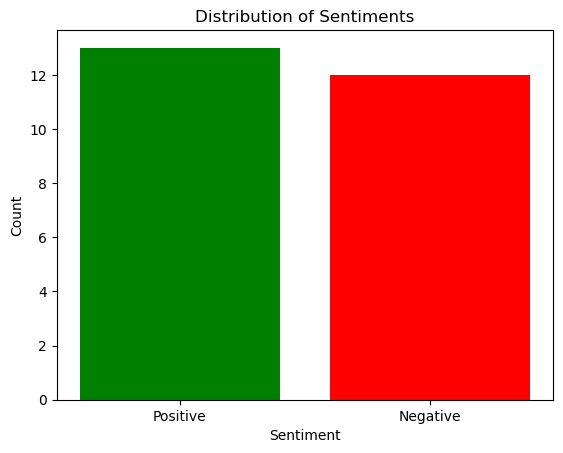

In [69]:
print(sent_arr)

import matplotlib.pyplot as plt

# Count the occurrences of positive and negative sentiments
positive_count = sent_arr.count("Positive")
negative_count = sent_arr.count("Negative")

# Labels and values for the bar chart
labels = ["Positive", "Negative"]
values = [positive_count, negative_count]

# Create a bar chart
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


Positive review ['unfortunately', 'delayed', 'miss', 'hard', 'missed', 'stuck']
Positive review ['hard', 'sadly']
Positive review ['delayed']
Negative review ['rude', 'poor']
Positive review []
Negative review ['failed', 'delayed', 'demanded', 'ignored', 'unpleasant']
Negative review ['lost', 'lose', 'missing']
Negative review ['delay', 'blamed', 'missed']
Negative review ['delayed', 'blame', 'inability', 'demand']
Positive review []
Positive review ['overselling', 'stopped']
Positive review ['delayed', 'irritant']
Negative review ['unpleasant', 'terrible']
Negative review ['terrible', 'leave', 'cancelled', 'unfortunately', 'mistake', 'abandoned', 'refused', 'charges', 'problem', 'mistake', 'cancel']
Negative review ['crisis', 'lost', 'disaster']
Negative review ['rude', 'argumentative']
Negative review ['disaster', 'problem', 'leave', 'cancelled', 'delayed', 'terrible']
Negative review ['cancelled', 'cancelled', 'cancelled', 'injury', 'unacceptable', 'alone']
Positive review ['unfortu

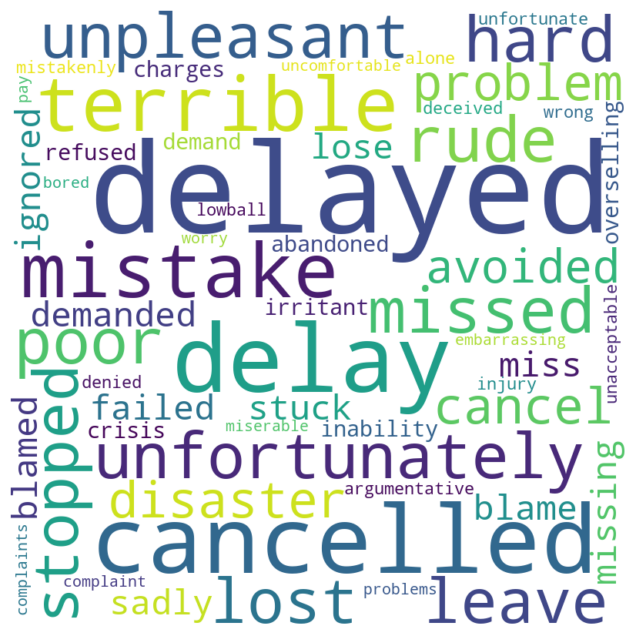

In [72]:
for x in range(len(arr)):
    print(sent_arr[x] +" review", neg_arr[x])
    
from collections import Counter
flattened_array = [item for sublist in neg_arr for item in sublist]
string_count = Counter(flattened_array)
most_common_string, count = string_count.most_common(1)[0]
print(f"The most common string is '{most_common_string}' with a count of {count}")

# Step 4: Generate a Word Cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(string_count)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

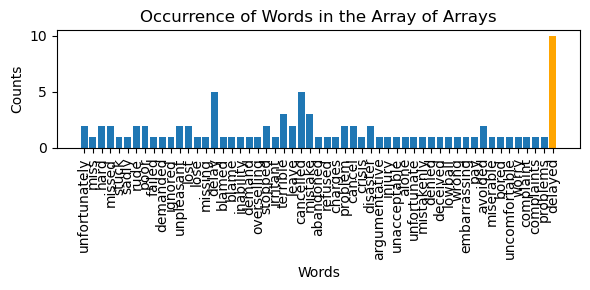

In [79]:
del string_count[most_common_string]

# Prepare data for plotting
labels = list(string_count.keys())
counts = list(string_count.values())

# Create the bar plot
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, label="Other Words")
plt.bar(most_common_string, count, color='orange', label="Most Common Word")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Occurrence of Words in the Array of Arrays")
#plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()